In [2]:
#!pip install kaggle

In [3]:
## Configuring the path of kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
## Dataset API
!kaggle competitions download -c cifar-10

100% 713M/715M [00:06<00:00, 134MB/s]
100% 715M/715M [00:06<00:00, 124MB/s]


In [5]:
# Extracting the compressed dataset

from zipfile import ZipFile

data = '/content/cifar-10.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The dataset has been extracted')

The dataset has been extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
## To extract .7z file
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.9 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


##**Importing Neccessary Libraries**

In [10]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

print(type(filenames), len(filenames))

<class 'list'> 50000


In [12]:
print(filenames[0:5])
print(filenames[-5:])

['41310.png', '39080.png', '35059.png', '37223.png', '32461.png']
['6303.png', '29209.png', '2058.png', '1556.png', '48333.png']


**Label Processing**

In [13]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [14]:
labels_df.shape

(50000, 2)

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels_df[labels_df['id']==49292]

,id,label
49291,49292,ship


In [17]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [18]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [19]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [20]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


**Displaying Sample Images**

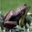

In [21]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/41888.png')
cv2_imshow(img)

In [22]:
id_list = list(labels_df['id'])

print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [23]:
## Converting images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [24]:
type(data)

list

In [25]:
len(data)

50000

In [26]:
type(data[0])

numpy.ndarray

In [27]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
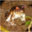

In [28]:
data[0]

In [29]:
## Convert Image list and label list to numpy arrays

X = np.array(data)
y = np.array(labels)

In [30]:
print(X.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


##**Train Test Split**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

##**Building Neural Network**

In [34]:
import tensorflow as tf
from tensorflow import keras

In [35]:
num_of_classes = 10

## Setting up layers of Neural Network

model = keras.Sequential([

      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(64, activation='relu'),
      keras.layers.Dense(num_of_classes, activation='softmax')
])

In [36]:
## Compiling Neural Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [37]:
## Training Neural Network
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 5s 3ms/step - loss: 1.9442 - acc: 0.2979 - val_loss: 1.8613 - val_acc: 0.3368
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8079 - acc: 0.3525 - val_loss: 1.7765 - val_acc: 0.3730
Epoch 3/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.7576 - acc: 0.3731 - val_loss: 1.7640 - val_acc: 0.3810
Epoch 4/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7299 - acc: 0.3851 - val_loss: 1.7616 - val_acc: 0.3742
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7128 - acc: 0.3903 - val_loss: 1.7079 - val_acc: 0.3975
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6979 - acc: 0.3954 - val_loss: 1.7395 - val_acc: 0.3837
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.6894 - acc: 0.3949 - val_loss: 1.7181 - val_acc: 0.3907
Epoch 8/10
1125/1125 [==============================] - 4s 4ms

##**ResNet50**

In [38]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [39]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [40]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax')) #Output layerr

In [41]:
model.compile(optimizer=optimizers.
              RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [42]:
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 490s 400ms/step - loss: 1.6727 - acc: 0.4420 - val_loss: 0.8837 - val_acc: 0.7550
Epoch 2/10
1125/1125 [==============================] - 459s 408ms/step - loss: 1.0049 - acc: 0.7007 - val_loss: 0.5116 - val_acc: 0.8723
Epoch 3/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.7357 - acc: 0.8057 - val_loss: 0.3681 - val_acc: 0.9143
Epoch 4/10
1125/1125 [==============================] - 452s 402ms/step - loss: 0.5742 - acc: 0.8648 - val_loss: 0.3034 - val_acc: 0.9250
Epoch 5/10
1125/1125 [==============================] - 458s 407ms/step - loss: 0.4517 - acc: 0.9046 - val_loss: 0.2615 - val_acc: 0.9342
Epoch 6/10
1125/1125 [==============================] - 451s 401ms/step - loss: 0.3579 - acc: 0.9314 - val_loss: 0.2386 - val_acc: 0.9440
Epoch 7/10
1125/1125 [==============================] - 458s 407ms/step - loss: 0.2840 - acc: 0.9522 - val_loss: 0.2282 - val_acc: 0.9417
Epoch 8/10
1125/1125 [============

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy: ', accuracy)

313/313 [==============================] - 42s 126ms/step - loss: 0.2165 - acc: 0.9416
Test Accuracy:  0.9416000247001648


In [44]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Loss: ', loss)

313/313 [==============================] - 37s 117ms/step - loss: 0.2165 - acc: 0.9416
Test Loss:  0.2164798527956009


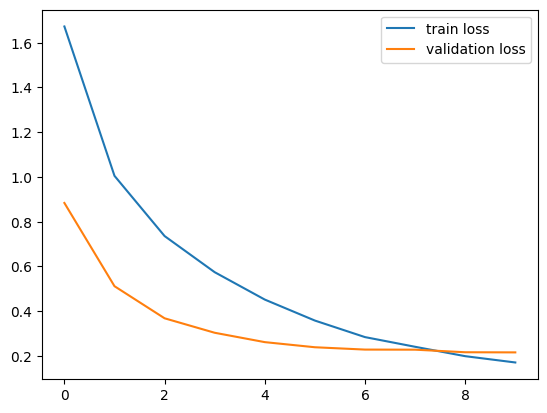

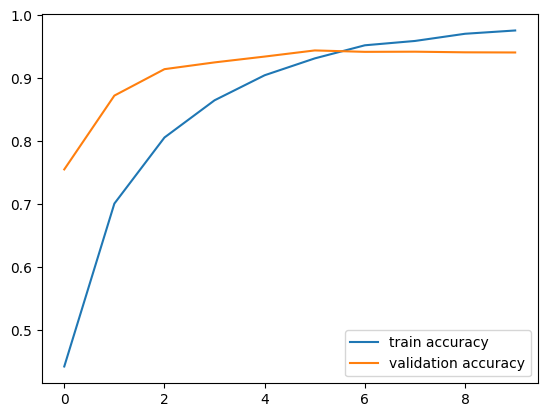

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()